In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('./data/all_sites_scores.csv')
df2 = pd.read_csv('./data/fandango_scrape.csv')
df1.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [6]:
df2.head()
# df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

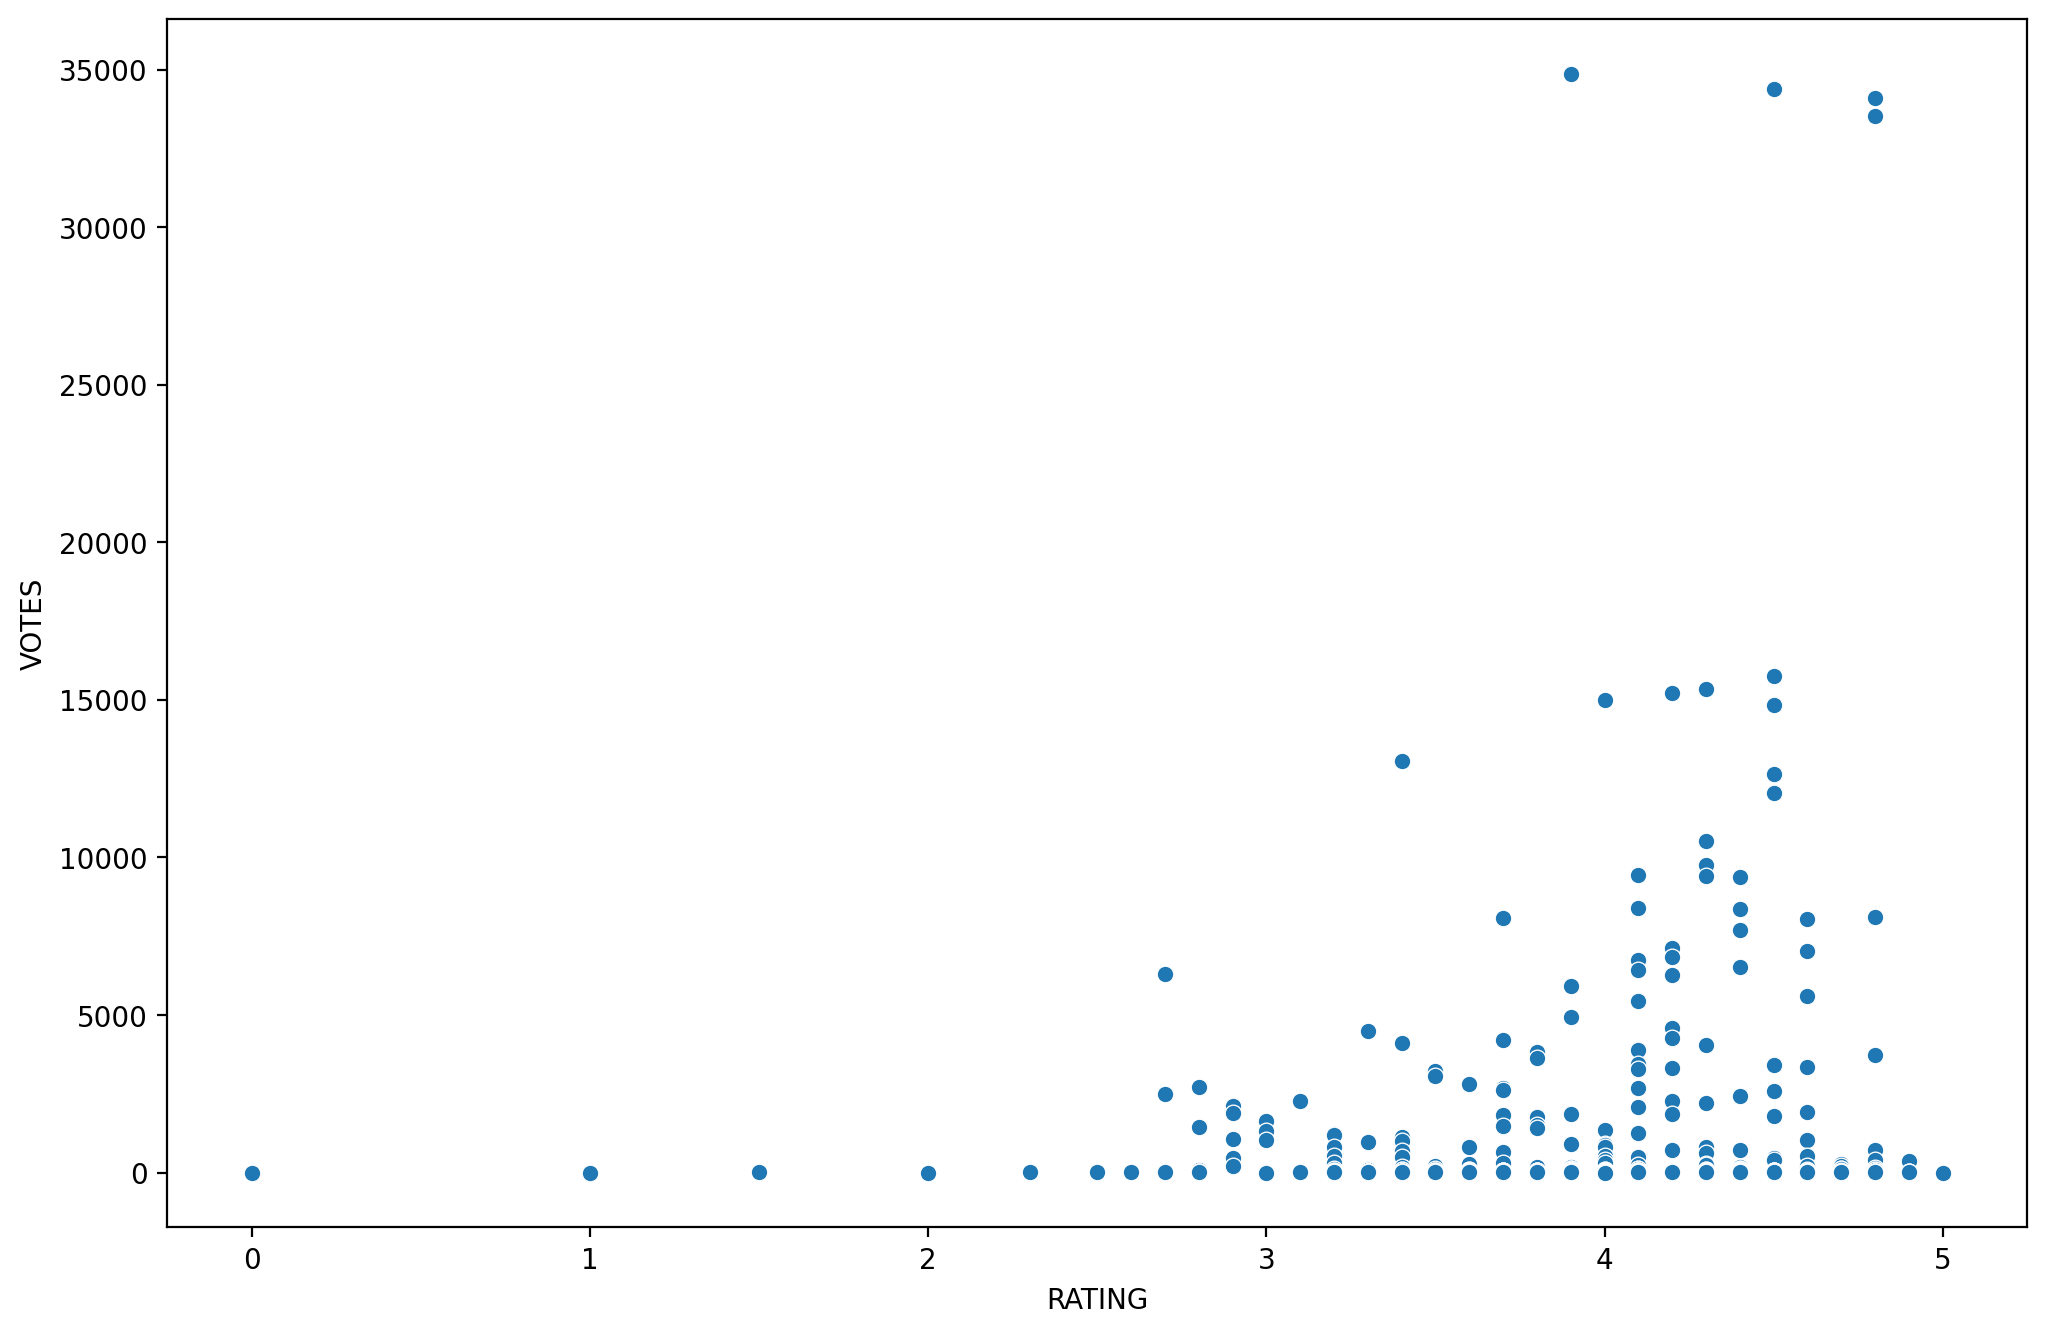

In [8]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df2,y='VOTES',x='RATING')

In [9]:
# calculate correlation
df2.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [13]:
# title
df2['YEAR'] = df2['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))
df2

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [14]:
df2['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

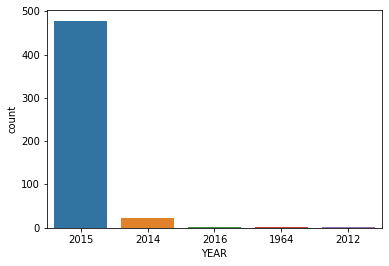

In [15]:
sns.countplot(data=df2,x='YEAR')

In [16]:
df2.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [17]:
no = df2['VOTES'] == 0
no.sum()

69

In [19]:
reviwed = df2[df2['VOTES'] > 0 ]
reviwed

<bound method DataFrame.count of                             FILM  STARS  RATING  VOTES  YEAR
0    Fifty Shades of Grey (2015)    4.0     3.9  34846  2015
1          Jurassic World (2015)    4.5     4.5  34390  2015
2         American Sniper (2015)    5.0     4.8  34085  2015
3               Furious 7 (2015)    5.0     4.8  33538  2015
4              Inside Out (2015)    4.5     4.5  15749  2015
..                           ...    ...     ...    ...   ...
430       That Sugar Film (2015)    5.0     5.0      1  2015
431            The Intern (2015)    5.0     5.0      1  2015
432        The Park Bench (2015)    5.0     5.0      1  2015
433         The Wanted 18 (2015)    5.0     5.0      1  2015
434       Z For Zachariah (2015)    5.0     5.0      1  2015

[435 rows x 5 columns]>

<AxesSubplot:xlabel='RATING', ylabel='Density'>

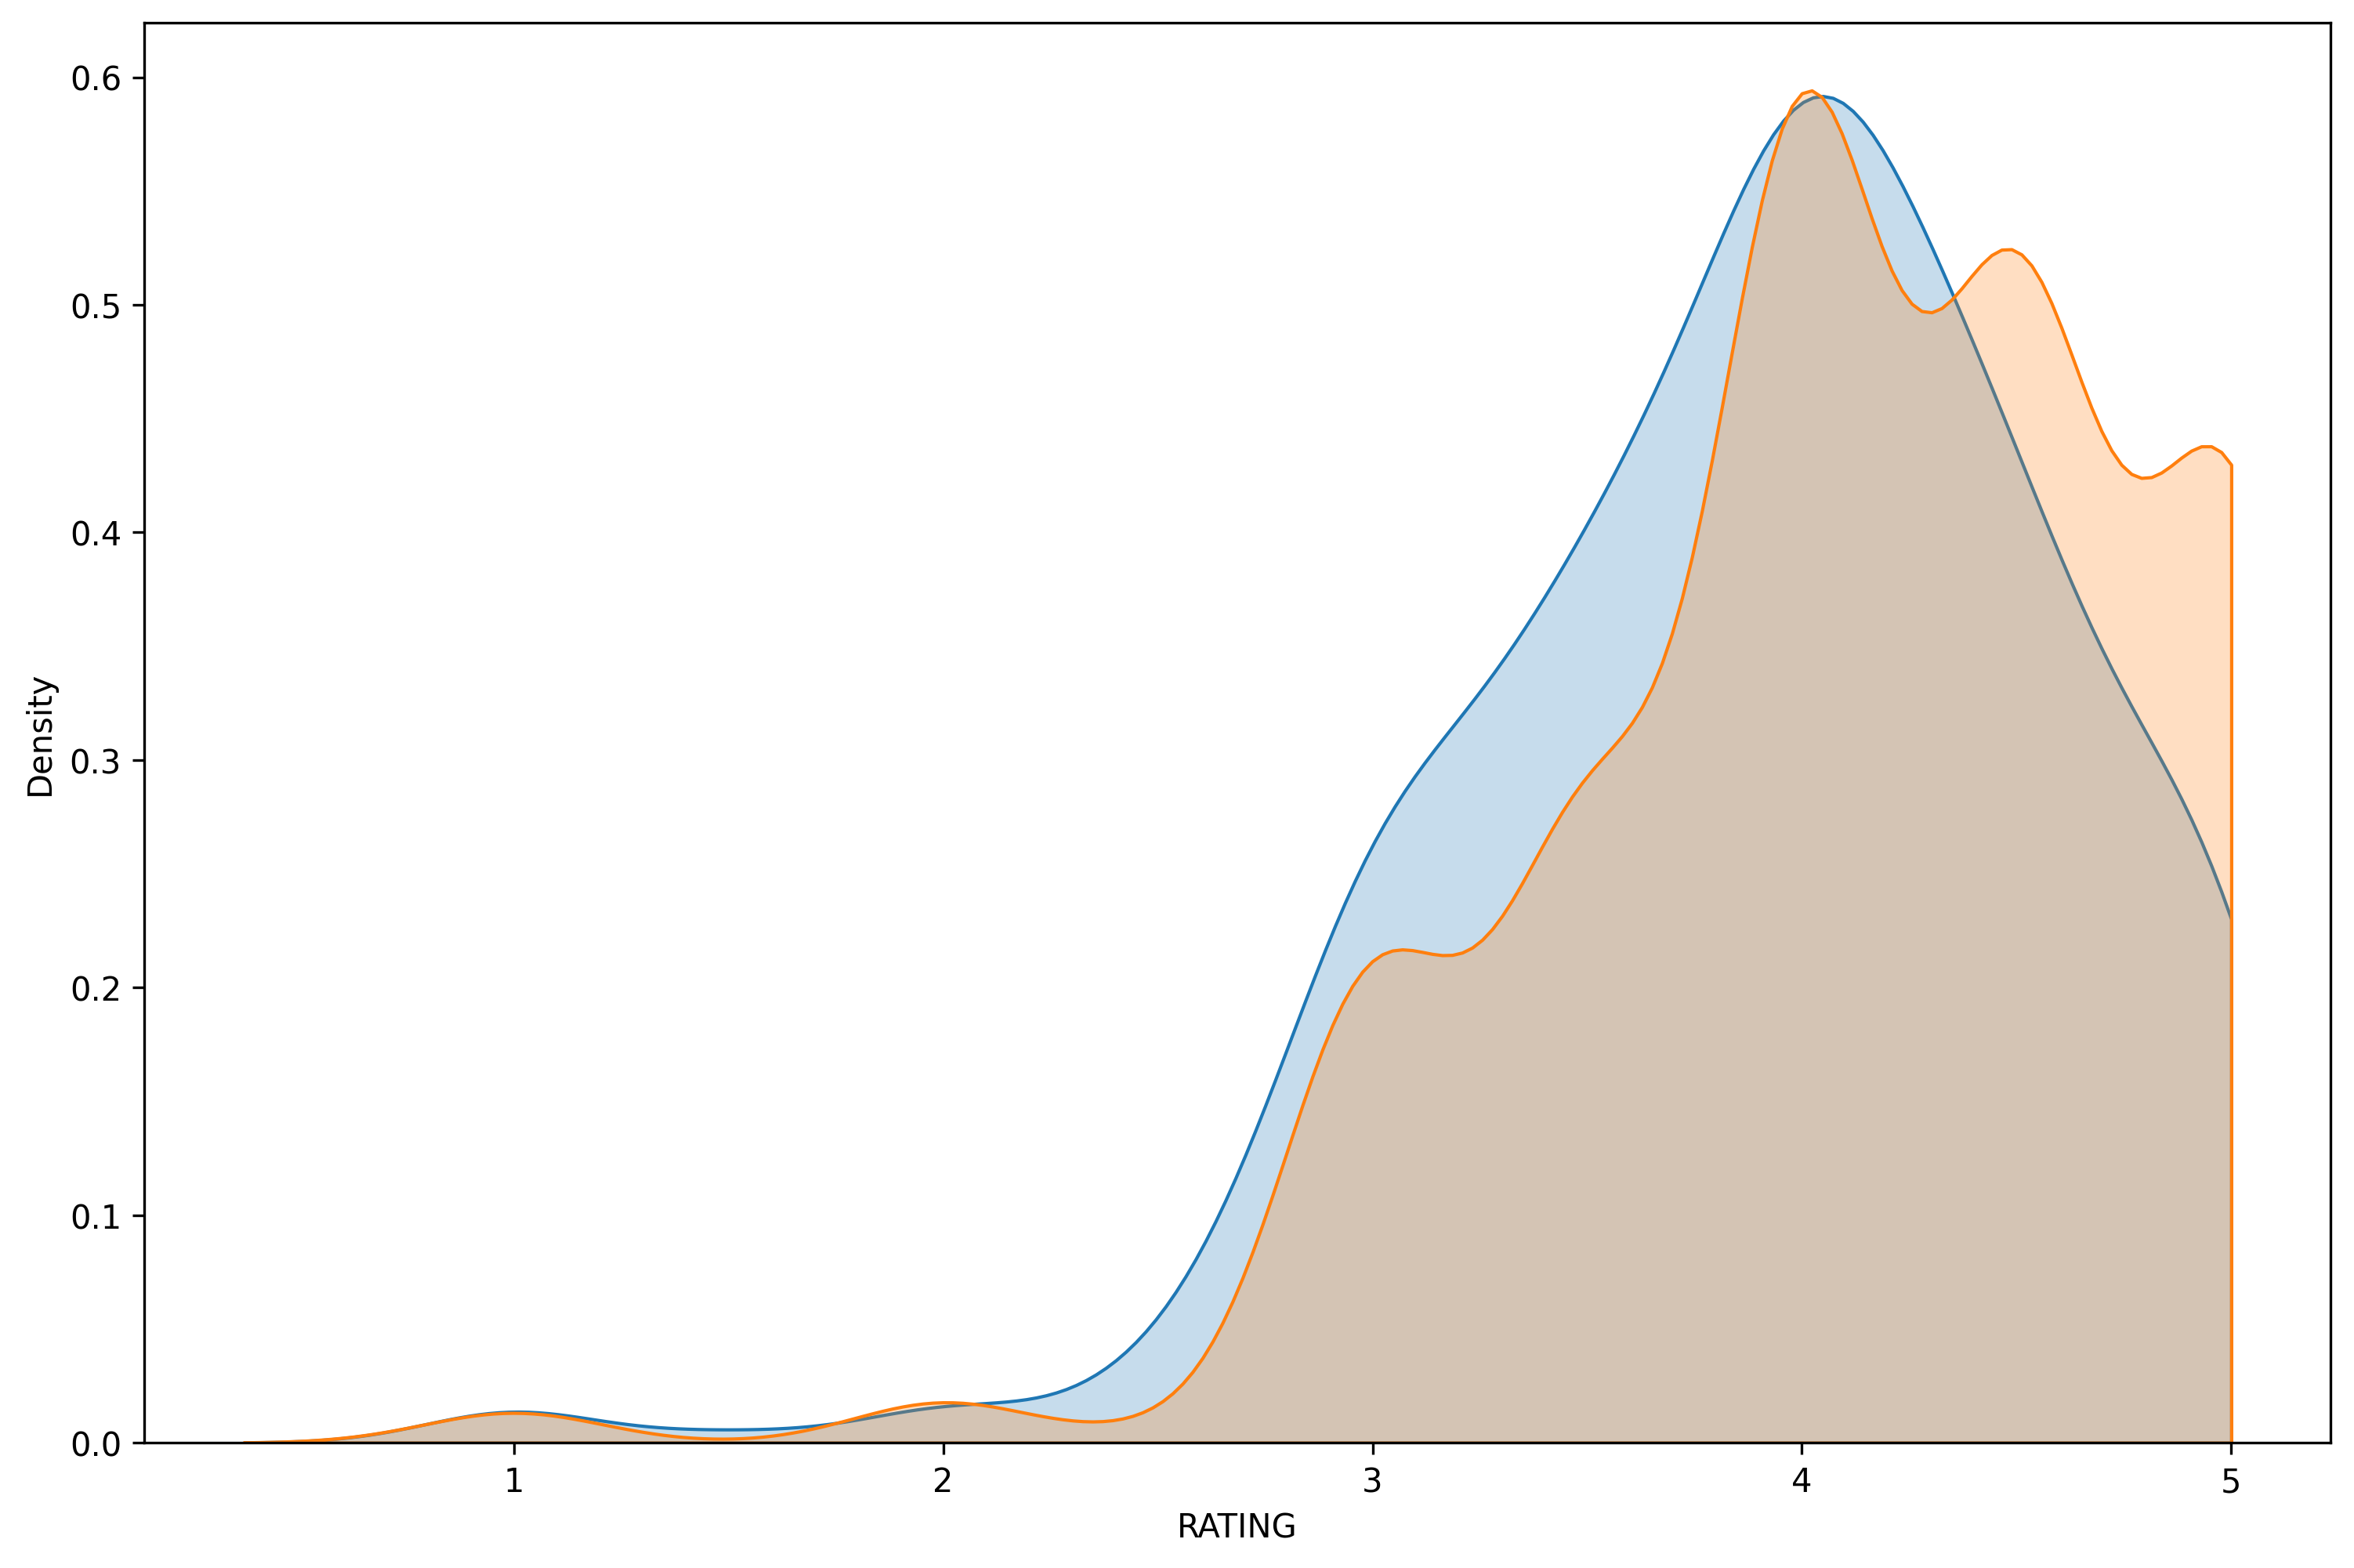

In [23]:
plt.figure(figsize=(12,8),dpi=300)
sns.kdeplot(data=reviwed,x='RATING',clip=[0,5],fill=True,label=True)
sns.kdeplot(data=reviwed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

In [ ]:
reviwed['STARS_DIFF'] = reviwed['STARS'] - reviwed['RATING']
reviwed['STARS_DIFF'] = reviwed['STARS_DIFF'].round(2)

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

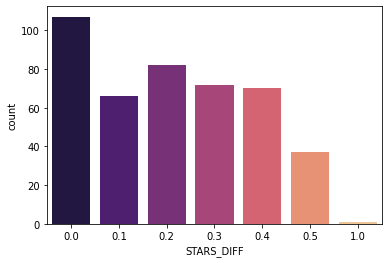

In [28]:
sns.countplot(data=reviwed,x='STARS_DIFF',palette='magma')